# Feedback for tutors

In [1]:
from github2pandas.utility import Utility
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import os
import sys
sys.path.append('../')
from src.DataHandling import DataHandling
from src.Utilities import getrepofolder, getTeamName
%load_ext autoreload
%autoreload 2

In [2]:
project_folder_name = "../data/"
project_parameter_file = "parameter.yml"
dataHandler = DataHandling(project_folder_name, project_parameter_file)
github_token = os.environ['TOKEN']

relevant_repos = Utility.get_repos(github_token, 
                                    dataHandler.basic_folder,
                                    dataHandler.whitelist_pattern,
                                    dataHandler.blacklist_pattern)

Loading parameter file ... ../data/parameter.yml


In [3]:
print("While crawling the following patterns") 
for entry in list(dataHandler.whitelist_pattern):
    print("'" + entry + "'")
print("{} repos found!".format(len(relevant_repos)))

While crawling the following patterns
'softwareentwicklung_aufgabe3_sose2021'
17 repos found!


In [4]:
anonym_pdCommits = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdCommits.p")
anonym_pdReleases = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdReleases.p")
anonym_pdEdits = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdEdits.p")

## Working times

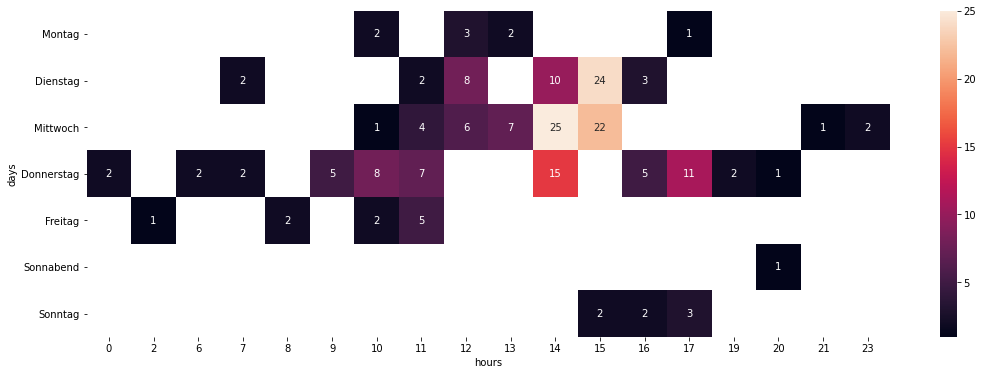

In [5]:
anonym_pdCommits['days'] = anonym_pdCommits.commited_at.dt.dayofweek
anonym_pdCommits['hours'] = anonym_pdCommits.commited_at.dt.hour
fig, ax = plt.subplots(figsize=(18,6))
y_axis_labels = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Sonnabend', 'Sonntag']

g = sns.heatmap(anonym_pdCommits[anonym_pdCommits.commiter_role != 'github']\
                                             .groupby(['days', 'hours'])['commited_at']\
                                             .count()\
                                             .unstack(), 
            annot=True, yticklabels=y_axis_labels, ax=ax)

plt.show()

## Commits per Task 

In [6]:
s = anonym_pdCommits[anonym_pdCommits.commiter_role != 'github']\
                     .groupby(['teamKey', 'task'])\
                     .commit_sha.count()\
                     .unstack().transpose()

print(s.to_markdown())

|   task |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |   10 |   11 |   12 |   13 |   14 |   15 |
|-------:|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|
|      3 |   7 |  15 |  12 |   8 |  18 |  10 |   5 |   8 |  45 |  21 |   13 |   18 |    8 |    6 |    6 |    3 |
